# Exercícios: Teste de Normalidade e Teste de Hipótese

Aplique os conhecimentos do notebook resolvendo os problemas abaixo.



In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Exercício 1: Teste de Normalidade

1. Aplique o teste de Shapiro-Wilk e interprete o resultado (α = 0.05)
2. A média de valores nas duas distribuições se difere da média histórica (20)

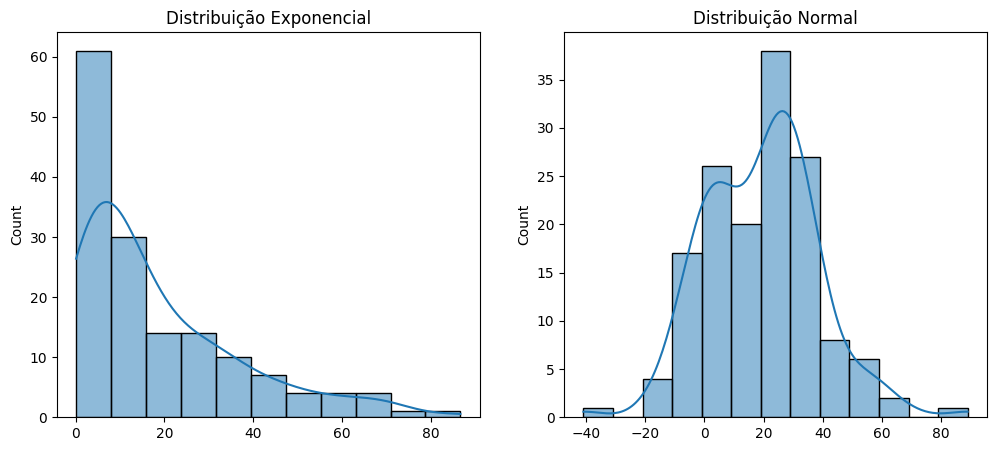

In [7]:
np.random.seed(42)
exponencial = np.random.exponential(scale=20, size=150)
normal = np.random.normal(loc=exponencial.mean(), scale=exponencial.std(), size=150)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(exponencial, kde=True)
plt.title('Distribuição Exponencial')

plt.subplot(1, 2, 2)
sns.histplot(normal, kde=True)
plt.title('Distribuição Normal')
plt.show()

In [83]:
# Espaço para sua solução

#Shapiro
stat_e, e = stats.shapiro(exponencial)
print(f'Estatistica do teste: {stat_e:.4f}, valor-e: {e:.4f}')

if e > 0.05:
  print("Os dados seguem uma disribuição normal (falha em rejeitar h0)")
else:
  print("Os dados NÃO seguem uma distribuição normal (rejeita-se h0)")

stat_n, n = stats.shapiro(normal)
print(f'Estatistica do teste: {stat_n:.4f}, valor-n: {n:.4f}')

if n > 0.05:
  print("Os dados seguem uma disribuição normal (falha em rejeitar h0)")
else:
  print("Os dados NÃO seguem uma distribuição normal (rejeita-se h0)")

# Média histórica
media_hipotetica = 20

# Teste t para uma amostra
t_stats_e, e_val = stats.ttest_1samp(exponencial, media_hipotetica)

print(f'Estatisca do teste: {t_stats_e:.4f}, p_val: {e_val:.4f}')

if e_val > 0.05:
    print("A média da amostra é igual a média histórica (20) (falha em rejeitar h0)")
else:
    print("A média da amostra é diferente da média histórica (rejeita-se h0)")

t_stats_n, n_val = stats.ttest_1samp(normal, media_hipotetica)

print(f'Estatisca do teste: {t_stats_n:.4f}, p_val: {n_val:.4f}')

if n_val > 0.05:
    print("A média da amostra é igual a média histórica (20) (falha em rejeitar h0)")
else:
    print("A média da amostra é diferente da média histórica (rejeita-se h0)")

Estatistica do teste: 0.8407, valor-e: 0.0000
Os dados NÃO seguem uma distribuição normal (rejeita-se h0)
Estatistica do teste: 0.9821, valor-n: 0.0478
Os dados NÃO seguem uma distribuição normal (rejeita-se h0)
Estatisca do teste: -1.0278, p_val: 0.3057
A média da amostra é igual a média histórica (20) (falha em rejeitar h0)
Estatisca do teste: -0.4433, p_val: 0.6582
A média da amostra é igual a média histórica (20) (falha em rejeitar h0)




*   Os dados normais e exponenciais não seguem uma distribuição normal
*   Os dedos normais e exponenciais são iguais a média histórica




## Exercício 2: Teste t para uma Amostra

Um fabricante afirma que suas lâmpadas têm vida média de 1200 horas. Uma amostra de 30 lâmpadas apresentou:

1. Verifique a normalidade dos dados
2. Teste a hipótese do fabricante (H0: μ = 1200)
3. Interprete o resultado com α = 0.05

In [15]:
amostra = np.array([1150, 1250, 1100, 1180, 1210, 1300, 1220, 1170, 1190, 1240,
                   1160, 1230, 1200, 1190, 1210, 1180, 1220, 1170, 1200, 1250,
                   1100, 1180, 1230, 1190, 1210, 1170, 1220, 1180, 1200, 1240])

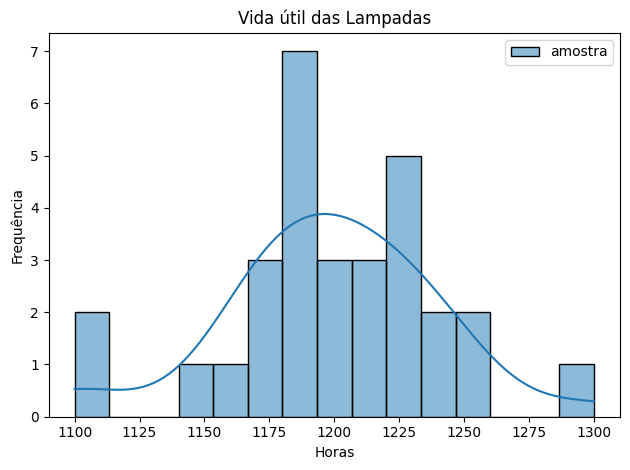

Estatistica do teste: 0.9591, valor-l: 0.2937
Os dados seguem uma disribuição normal (falha em rejeitar h0)
Estatisca do teste: -0.2636, l_val: 0.7939
A média da amostra é igual a média histórica (1200) (falha em rejeitar h0)


In [84]:
# Espaço para sua solução

dicionario = {'amostra': amostra}

df_lampadas = pd.DataFrame(dicionario)

#Histograma

sns.histplot(data=df_lampadas, bins=15, kde=True, color='salmon')
plt.title('Vida útil das Lampadas')
plt.xlabel('Horas')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

#Shapiro
stat_l, l = stats.shapiro(df_lampadas['amostra'])
print(f'Estatistica do teste: {stat_l:.4f}, valor-l: {l:.4f}')

if l > 0.05:
  print("Os dados seguem uma disribuição normal (falha em rejeitar h0)")
else:
  print("Os dados NÃO seguem uma distribuição normal (rejeita-se h0)")

#Hipotese
media_hipotetica_lampadas = 1200

t_stats_l, l_val = stats.ttest_1samp(df_lampadas['amostra'], media_hipotetica_lampadas)

print(f'Estatisca do teste: {t_stats_l:.4f}, l_val: {l_val:.4f}')

if l_val > 0.05:
    print("A média da amostra é igual a média histórica (1200) (falha em rejeitar h0)")
else:
    print("A média da amostra é diferente da média histórica (rejeita-se h0)")

*   Os dados das lampadas seguem uma disribuição normal
*   A média das lampadas é igual a média histórica pois o l_val é maior que 0.05



## Exercício 3: ANOVA

# Análise Estatística de Eficácia de Tratamentos Médicos

## Contexto
Um laboratório farmacêutico desenvolveu dois novos medicamentos (Droga X e Droga Y) para redução de pressão arterial e deseja comparar sua eficácia com um placebo em um ensaio clínico randomizado.

## Dados
Foram coletados dados de 90 pacientes (30 em cada grupo) após 4 semanas de tratamento:
- **Grupo A (Placebo)**: Tratamento com comprimido inertes
- **Grupo B (Droga X)**: Medicação padrão do mercado
- **Grupo C (Droga Y)**: Nova medicação experimental

A variável resposta é a **redução da pressão arterial sistólica (mmHg)**.

## Objetivo
Determinar se existe diferença estatisticamente significativa na eficácia entre os três tratamentos.

## Tarefas
1. **Análise Exploratória**:
   - Visualizar a distribuição dos dados por grupo (boxplot)
   - Calcular estatísticas descritivas (média, desvio padrão)

2. **Verificação de Pressupostos**:
   - Testar normalidade dos dados (Shapiro-Wilk)
   - Verificar homogeneidade de variâncias (Levene)

3. **ANOVA Unidirecional**:
   - Executar o teste paramétrico
   - Interpretar o resultado (α = 0.05)

5. **Conclusão**:
   - Recomendar o tratamento mais eficaz

## Requisitos Técnicos
- Nível de significância: 5%
- Testes utilizados:
  - Shapiro-Wilk (normalidade)
  - Levene (homocedasticidade)
  - ANOVA paramétrica



In [39]:
# Dados simulados: redução da pressão arterial (mmHg) após 4 semanas de tratamento
np.random.seed(42)
tratamento_A = np.random.normal(loc=12, scale=2.5, size=30)  # Placebo
tratamento_B = np.random.normal(loc=15, scale=2.5, size=30)  # Droga X
tratamento_C = np.random.normal(loc=20, scale=2.5, size=30)  # Droga Y


df = pd.DataFrame({
    'Reducao': np.concatenate([tratamento_A, tratamento_B, tratamento_C]),
    'Tratamento': ['A']*30 + ['B']*30 + ['C']*30
})

<ipython-input-91-397985fd31b4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tratamento', y='Reducao', data=df, palette='pastel', showmeans=True,


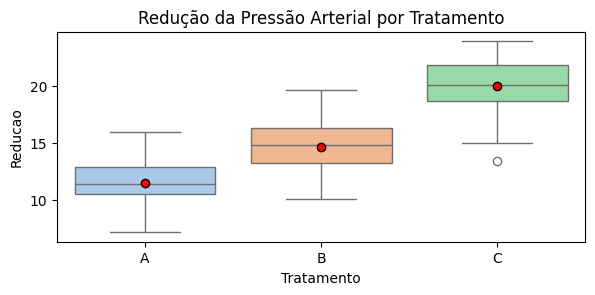

Média Tratamento A: 11.53 mmHg
Média Tratamento B: 14.70 mmHg
Média Tratamento C: 20.03 mmHg

Desvio padrão Tratamento A: 2.21 mmHg
Desvio padrão Tratamento B: 2.29 mmHg
Desvio padrão Tratamento C: 2.44 mmHg

Estatistica do teste: 0.9751, valor-a: 0.6868
Os dados seguem uma distribuição normal (falha em registrar h0)
Estatistica do teste: 0.9837, valor-b: 0.9130
Os dados seguem uma distribuição normal (falha em registrar h0)
Estatistica do teste: 0.9628, valor-c: 0.3654
Os dados seguem uma distribuição normal (falha em registrar h0)

Estatística de Levene: 0.1480 P valor: 0.8627
Os tratamentos tem variancia semelhante (falha em registrar h0)

Estatística de ANOVA: 99.92372436509423 P valor: 2.8924732859158176e-23
Os tratamentos apresentam diferenças significativas (rejeta-se h0)


In [91]:
# Espaço para sua solução

#Análise Exploratória
#boxplot
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 4)
sns.boxplot(x='Tratamento', y='Reducao', data=df, palette='pastel', showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black"})
plt.title('Redução da Pressão Arterial por Tratamento')
plt.show()
#Média e Desvio padrão

print(f"Média Tratamento A: {np.mean(tratamento_A):.2f} mmHg")  #sugestão ddof=1 por ser analise clinica
print(f"Média Tratamento B: {np.mean(tratamento_B):.2f} mmHg")
print(f"Média Tratamento C: {np.mean(tratamento_C):.2f} mmHg\n")

print(f"Desvio padrão Tratamento A: {np.std(tratamento_A):.2f} mmHg")
print(f"Desvio padrão Tratamento B: {np.std(tratamento_B):.2f} mmHg")
print(f"Desvio padrão Tratamento C: {np.std(tratamento_C):.2f} mmHg\n")

#2 - Verificação de pressuposto
#Shapiro
stat_a, a = stats.shapiro(tratamento_A)
print(f'Estatistica do teste: {stat_a:.4f}, valor-a: {a:.4f}')
if a > 0.05:
  print("Os dados seguem uma distribuição normal (falha em registrar h0)")
else:
  print("Os dados NÃO seguem uma distribuição normal (rejeta-se h0)")
#B
stat_b, b = stats.shapiro(tratamento_B)
print(f'Estatistica do teste: {stat_b:.4f}, valor-b: {b:.4f}')
if b > 0.05:
  print("Os dados seguem uma distribuição normal (falha em registrar h0)")
else:
  print("Os dados NÃO seguem uma distribuição normal (rejeta-se h0)")
#C
stat_c, c = stats.shapiro(tratamento_C)
print(f'Estatistica do teste: {stat_c:.4f}, valor-c: {c:.4f}')
if a > 0.05:
  print("Os dados seguem uma distribuição normal (falha em registrar h0)\n")
else:
  print("Os dados NÃO seguem uma distribuição normal (rejeta-se h0)\n")

#Levene
l_stats, l_p_val = stats.levene(tratamento_A, tratamento_B, tratamento_C)

print(f'Estatística de Levene: {l_stats:.4f} P valor: {l_p_val:.4f}')

if l_p_val > 0.05:
  print("Os tratamentos tem variancia semelhante (falha em registrar h0)\n")
else:
  print("Os tratamentos se diferem na variancia (rejeta se h0)\n")

#3 - ANOVA unidirecional

if l_p_val > 0.05:
  f_stat, p_anova = stats.f_oneway(tratamento_A, tratamento_B, tratamento_C)

  print(f'Estatística de ANOVA: {f_stat} P valor: {p_anova}')

  if p_anova > 0.05:
    print("Os tratamentos NÃO apresentam diferenças significativas (falha em registrar h0)")
  else:
    print("Os tratamentos apresentam diferenças significativas (rejeta-se h0)")

Segundo os dados da média, o tratamento que tem maior redução de pressão arterial foi o "tratamento C(droga Y)" e o teste de ANOVA prova isso porque o p-valor é menor que 0.05(5%), pelo fato de do valor de ANOVA ser quase 100% e  o p-valor 2.8%. Portanto os tratamentos apresentam diferenças significativas entre eles.